In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
campaign_data = pd.read_csv('campaign_data.csv')

In [4]:
campaign_data.head()

,hour,segments,device,result
0,9,51,Smartphone,1
1,9,51,Tablet,1
2,9,91,Smartphone,1
3,9,331,Desktop,1
4,9,41,Smartphone,1


In [5]:
campaign_data.shape

(3312, 4)

In [11]:
campaign_data.isnull().values.any()

False

In [31]:
campaign_data['result'].value_counts()

1    1658
0    1654
Name: result, dtype: int64

Text(0.5,0,'Hour')

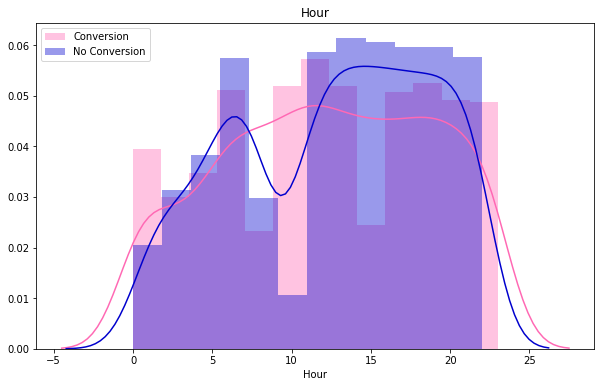

In [52]:
df = campaign_data
def distplot(feature):
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    sns.distplot(df[feature][df['result']==1] ,color='hotpink', ax=ax)
    sns.distplot(df[feature][df['result']==0] ,color='mediumblue', ax=ax )
    plt.legend(['Conversion', 'No Conversion'])

distplot('hour')
plt.title('Hour')
plt.xlabel('Hour')

Text(0.5,0,'Size of Household')

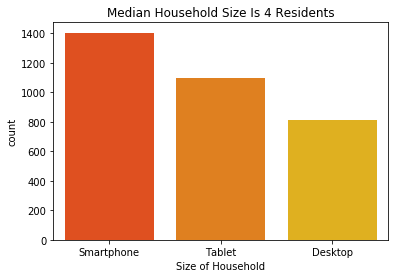

In [15]:
sns.countplot(campaign_data['device'], palette=("autumn"))
plt.title('Median Household Size Is 4 Residents')
plt.xlabel('Size of Household')

In [51]:
df = campaign_data
le = preprocessing.LabelEncoder()
le.fit(df['device'])
df['device_int'] = le.transform(df['device'])
print(df['device_int'].isnull().any())
print(dict(zip(df['device'], df['device_int'])))

False
{'Smartphone': 1, 'Tablet': 2, 'Desktop': 0}


Text(0.5,0,'Hour')

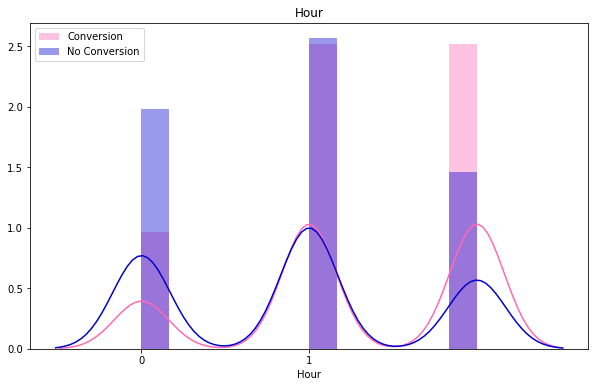

In [53]:
distplot('device_int')
plt.xticks(np.arange(0, 2, 1))
plt.title('Hour')
plt.xlabel('Hour')

In [63]:
#Load and split the data
data = df.drop(['result'], axis=1)
data = df.drop(['device'], axis=1)
target = df['result']

#Split data into 70% train, 30% test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=42)

Feature ranking:
1. feature 2 (0.969842)
2. feature 3 (0.019133)
3. feature 0 (0.009209)
4. feature 1 (0.001815)


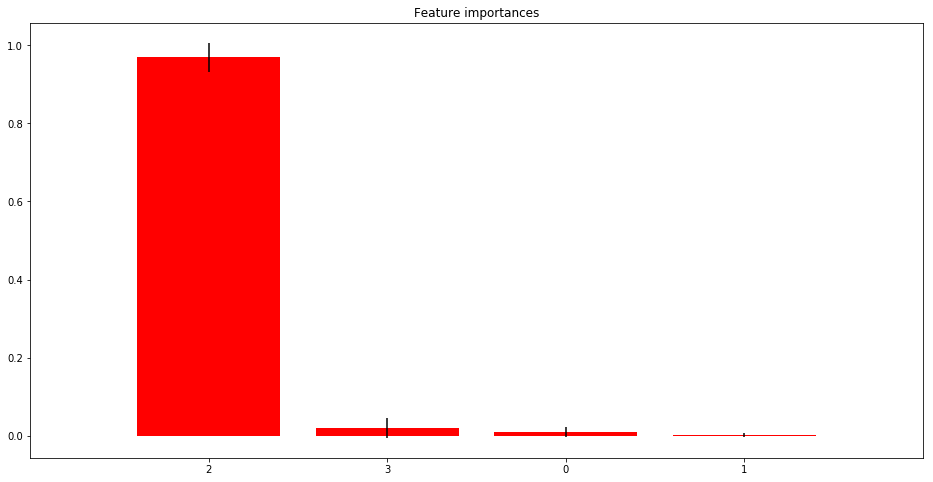

In [69]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [75]:
data2 = df.drop(['device'], axis=1)
array = data2.values
X = array[:,0:3]
Y = array[:,3]
# feature extraction
test = SelectKBest(score_func=f_classif, k=3)
fit = test.fit(X, Y)
# summarize scores
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  3.5132211    0.53680893  92.17757804]
[[  9  51   1]
 [  9  51   1]
 [  9  91   1]
 [  9 331   1]
 [  9  41   1]]


In [79]:
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[ 0.38142195  0.45487836  0.16369969]
